## Diabetes Prediction Analysis 

In [82]:
# Import neccessary libraries
# For Data Analysis
import pandas as pd
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine learning using scikit-learn 
# Study on scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Classifier Libraries
# Machine learning alogorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score 
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, auc, precision_recall_curve,  precision_recall_fscore_support

# For warnings
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

#### Load the data set

In [2]:
# Read the data to a data frame
data_df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
data_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# check for empty cells
data_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There are no empty cells in the data.

In [5]:
# look into the data more closely 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The column diabetes is the target feature/variable for the model training/testing.  

In [6]:
# describe the data to roughly observe for outliers
data_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


On a surface view there no outliers.

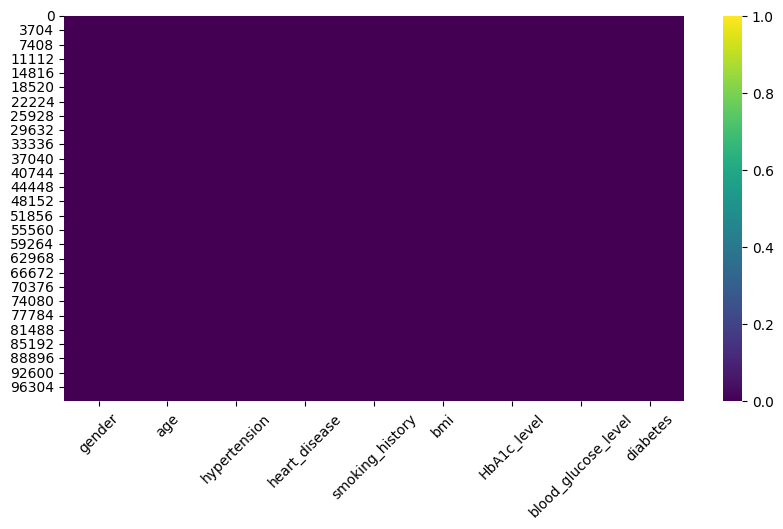

In [7]:
# Use visualizations to check if we have empty data cells.
plt.figure(figsize  =(10,5))
sns.heatmap(data = data_df.isnull(), cmap = "viridis", vmin = 0, vmax =1)
plt.xticks(rotation = 45)
plt.show();

## Exploratory Data Analysis EDA


#### Univariate EDA

In [8]:
data_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### Looking at the individual columns, next we try to identify and correct common data errors
</br>
</br>

##### Starting with Column Gender


In [9]:
data_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

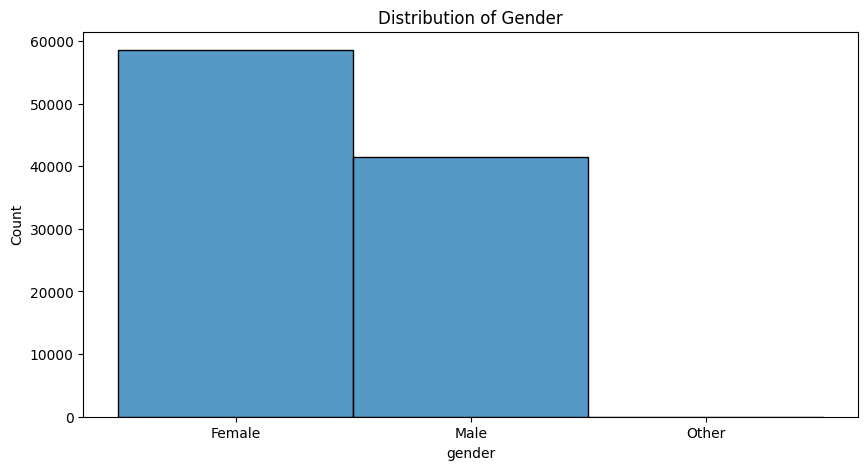

In [10]:
plt.figure(figsize = (10 ,5 ))
sns.histplot(data = data_df, x="gender", palette="blue")
plt.title("Distribution of Gender")
plt.ylabel("Count")
plt.show()

In [23]:
# Number of the gender distribution in the data set : males, females and others
males = data_df['gender'].value_counts()['Male']
females = data_df['gender'].value_counts()['Female']
others = data_df['gender'].value_counts()['Other']

# Calculating the percentage of each gender distribution in the data set
males_percentage = (males / (males + females + others)) * 100
females_percentage = (females / (males + females + others)) * 100
others_percentage = (others / (males + females + others)) * 100

# Outputing the results
print(f"Number of males in the data set: {males} , with a {males_percentage:.2f}% ")
print(f"Number of females in the data set: {females} , with a {females_percentage:.2f}% ")
print(f"Number of others in the data set: {others} , with a {others_percentage:.2f}% ")




Number of males in the data set: 41430 , with a 41.43% 
Number of females in the data set: 58552 , with a 58.55% 
Number of others in the data set: 18 , with a 0.02% 


In [11]:
# Investigate to see the number of rows, whose gender is others
other_gender= data_df[data_df["gender"]=="Other"]
other_gender.count()

gender                 18
age                    18
hypertension           18
heart_disease          18
smoking_history        18
bmi                    18
HbA1c_level            18
blood_glucose_level    18
diabetes               18
dtype: int64

We have 18 records with gender as Other

##### Next we look into age column.

In [12]:
# We discovered some ages are less than 1
less_than_1_age = data_df[data_df["age"]<1]
less_than_1_age

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,No Info,14.43,6.5,160,0
218,Female,0.56,0,0,No Info,16.85,5.0,140,0
241,Male,0.88,0,0,No Info,17.49,6.0,140,0
268,Female,0.16,0,0,No Info,12.15,6.6,100,0
396,Male,0.16,0,0,No Info,14.35,6.5,126,0
...,...,...,...,...,...,...,...,...,...
99452,Male,0.32,0,0,No Info,15.93,5.7,100,0
99536,Female,0.40,0,0,No Info,16.66,3.5,140,0
99629,Female,0.64,0,0,No Info,17.58,6.1,140,0
99778,Female,0.32,0,0,No Info,12.26,5.8,126,0


We have 911 rows having ages less than one so we correct this by multiplying each of this ages by 100

In [13]:
# Multiply each of the less than 1 ages by 100, to address the error, using a for loop and an if statement.
for index,age in enumerate(data_df["age"]):
    if age < 1.0:
        data_df["age"][index] = age*100
    else:
        data_df["age"][index]  = data_df["age"][index] 
 


In [14]:
# check to see if the technique in the above cell worked.
less_than_1_age = data_df[data_df["age"]<1]
less_than_1_age

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [15]:
# see the data
data_df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


Next, create age groups to add visualization of the age columns

In [16]:
# Determine number of intervals
num_intervals = 5
intervals = (data_df["age"].max() - data_df["age"].min()) // num_intervals
intervals 

17.0

interval = 17

In [17]:
# create a function that will use the interval to create age_group
def age_group(age):
    if age < 18:
        return "Child"
    elif age < 65:
        return "Adult"
    else:
        return "Senior"
    
# create a function that will use the interval to create BMI_group
def BMI_group(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"
    


In [18]:
# apply this to the dataset to create more features
data_df["age_group"] = data_df["age"].apply(age_group)
data_df["bmi_group"] = data_df["bmi"].apply(BMI_group)





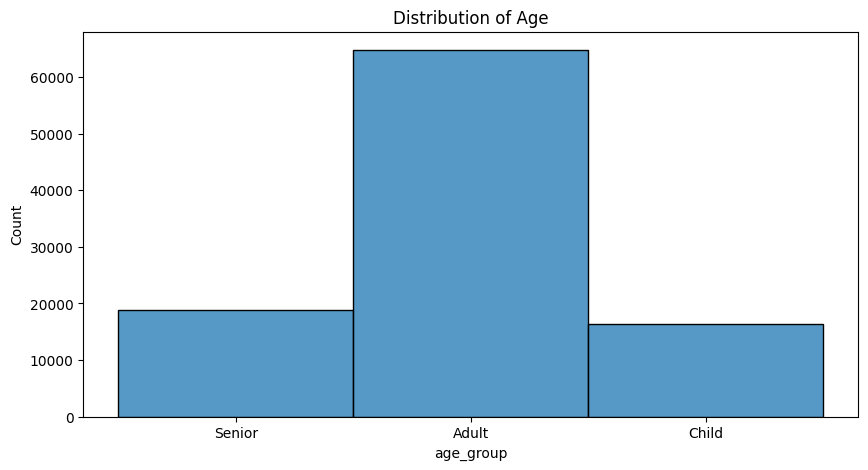

In [24]:
# visualize age distribution
plt.figure(figsize = (10 ,5 ))
sns.histplot(data = data_df, x="age_group")
plt.title("Distribution of Age")
plt.ylabel("Count")
plt.show()

We have a higher distribution of Adults, ages 18 to 65 in the dataset.

##### Visualize the features of the data

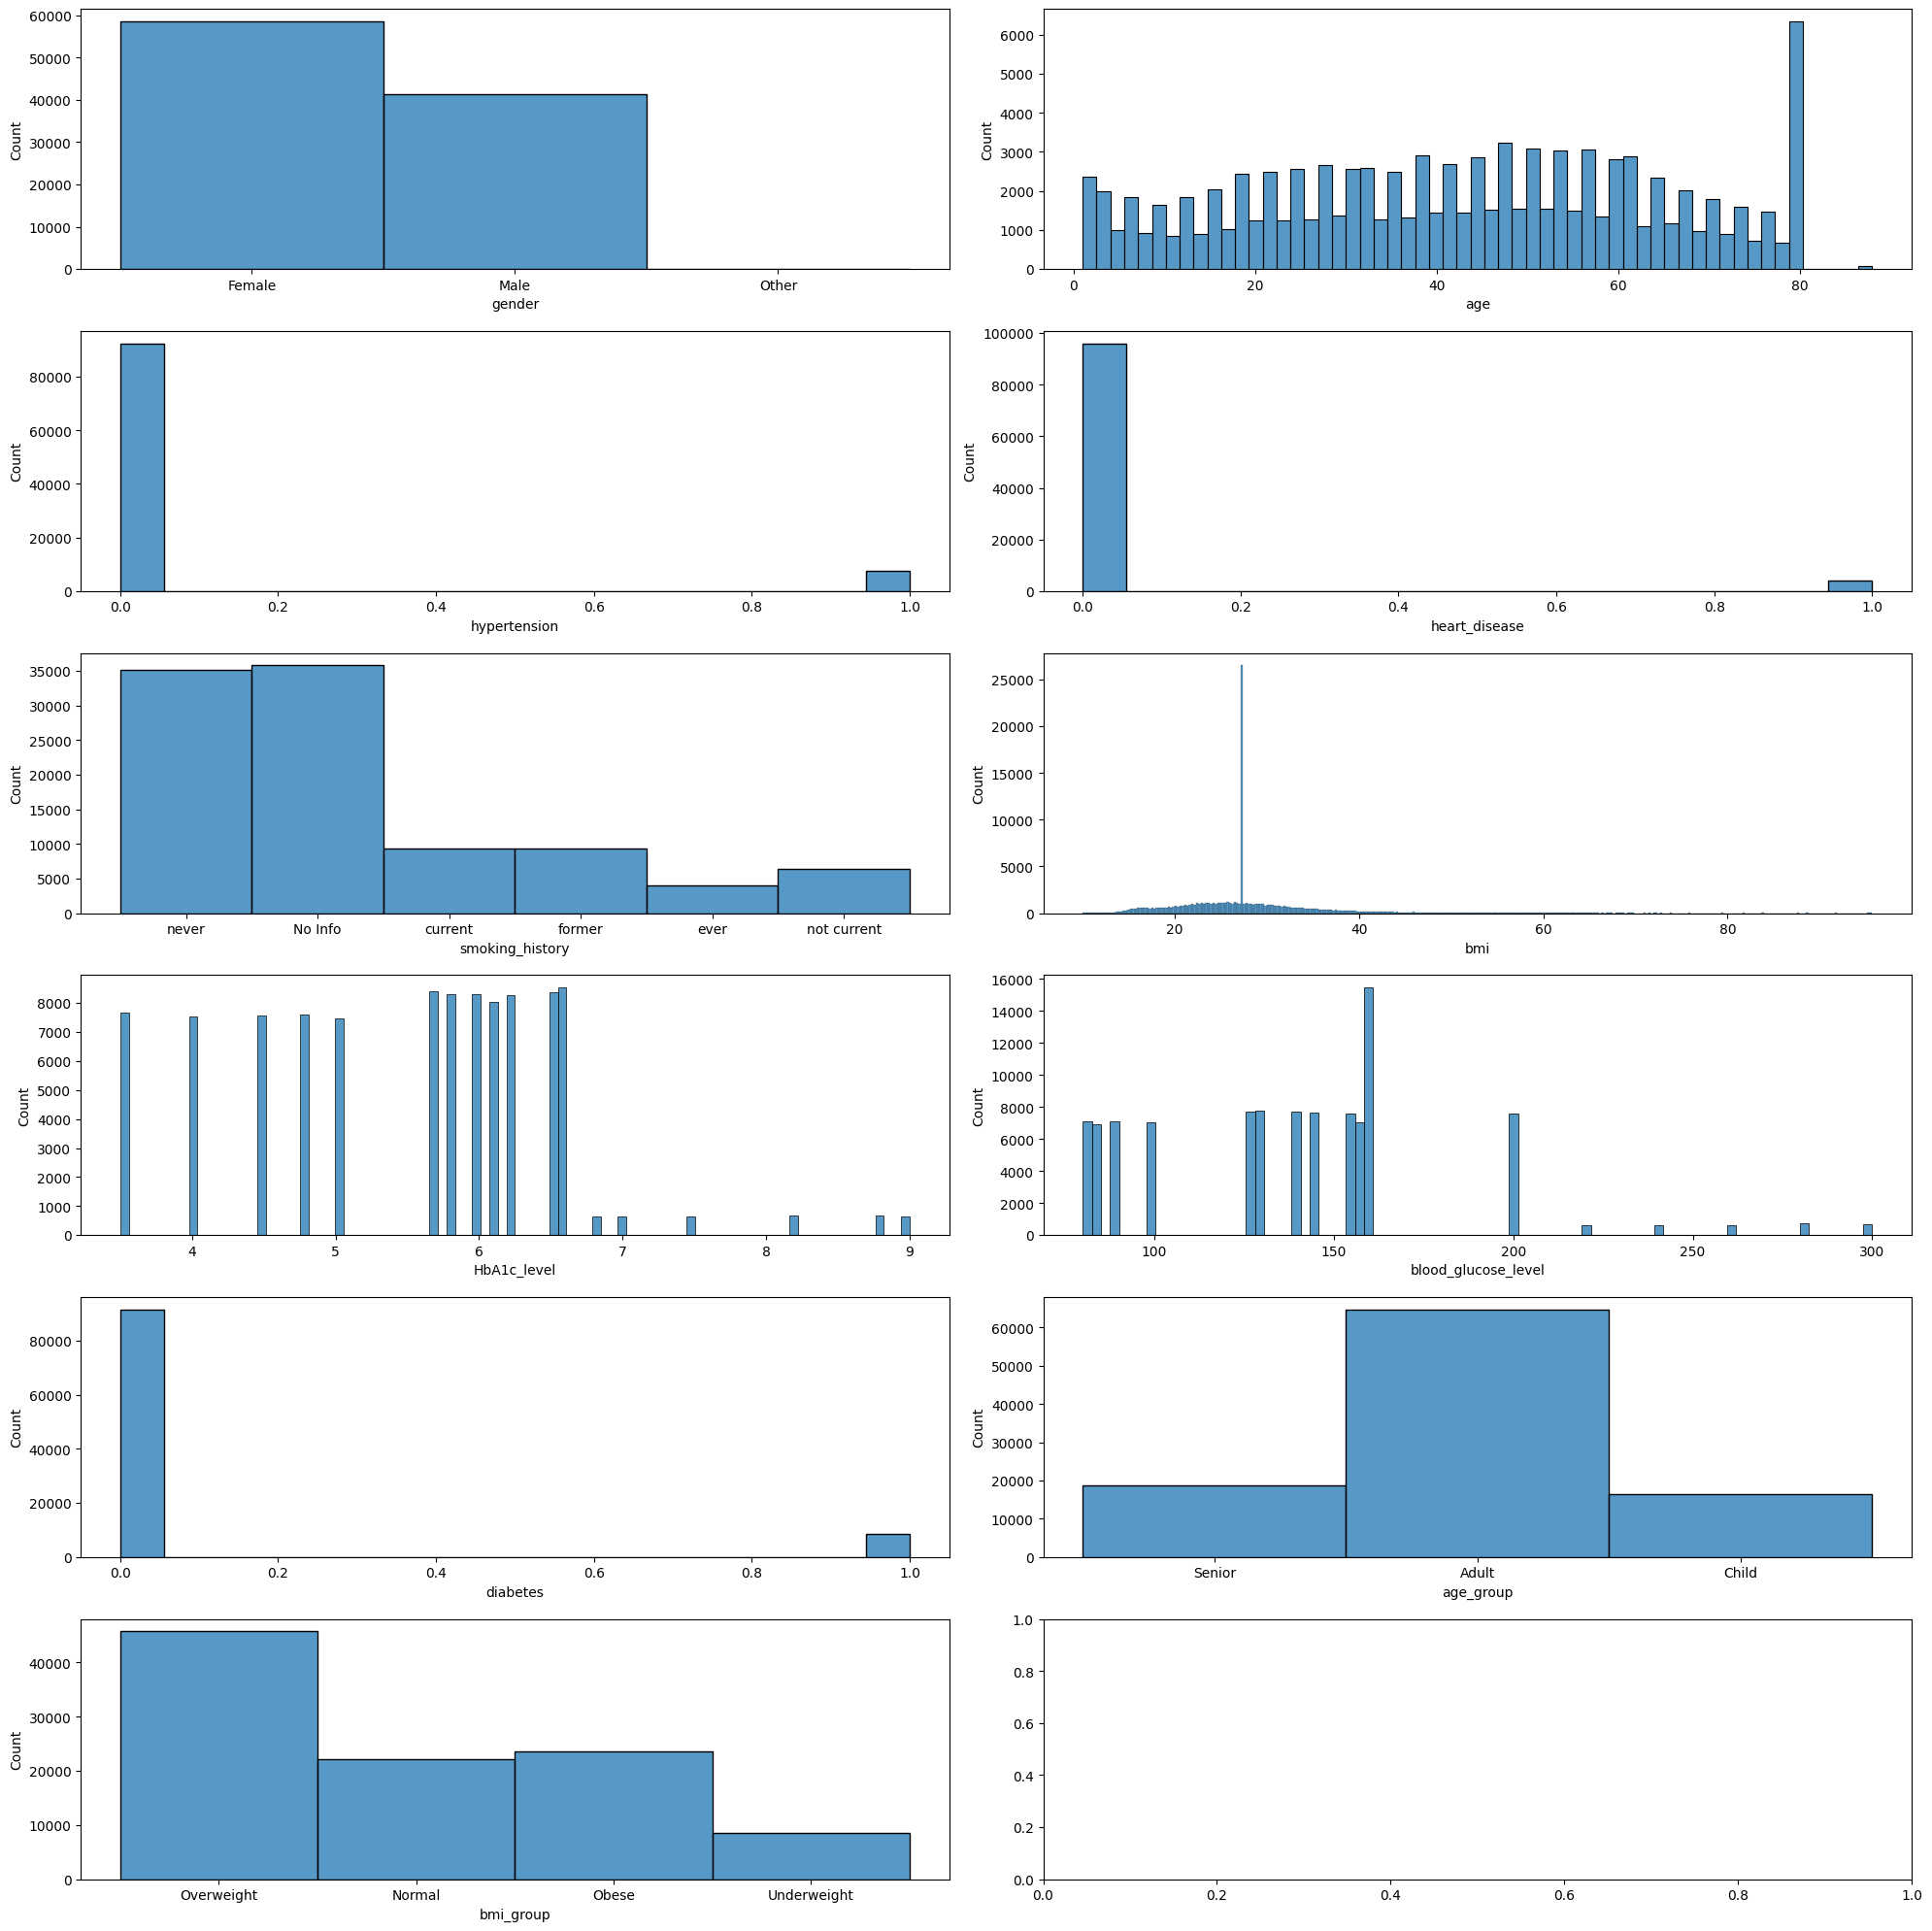

In [27]:
# Visualize each column /feature in a histogram using a for loop to understand the data better.
n_features  = len(data_df.columns.to_list())
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (20,20))

position  = axes.flatten()

for index, name_of_feature in enumerate(data_df):
    sns.histplot(data = data_df[name_of_feature], ax = position[index])
    
plt.tight_layout()
             

From the data set distribution, most patient in data doesnot have diabetes, so the ML model will have to learn more from the samples where the patients have a 1 value diabetes. 

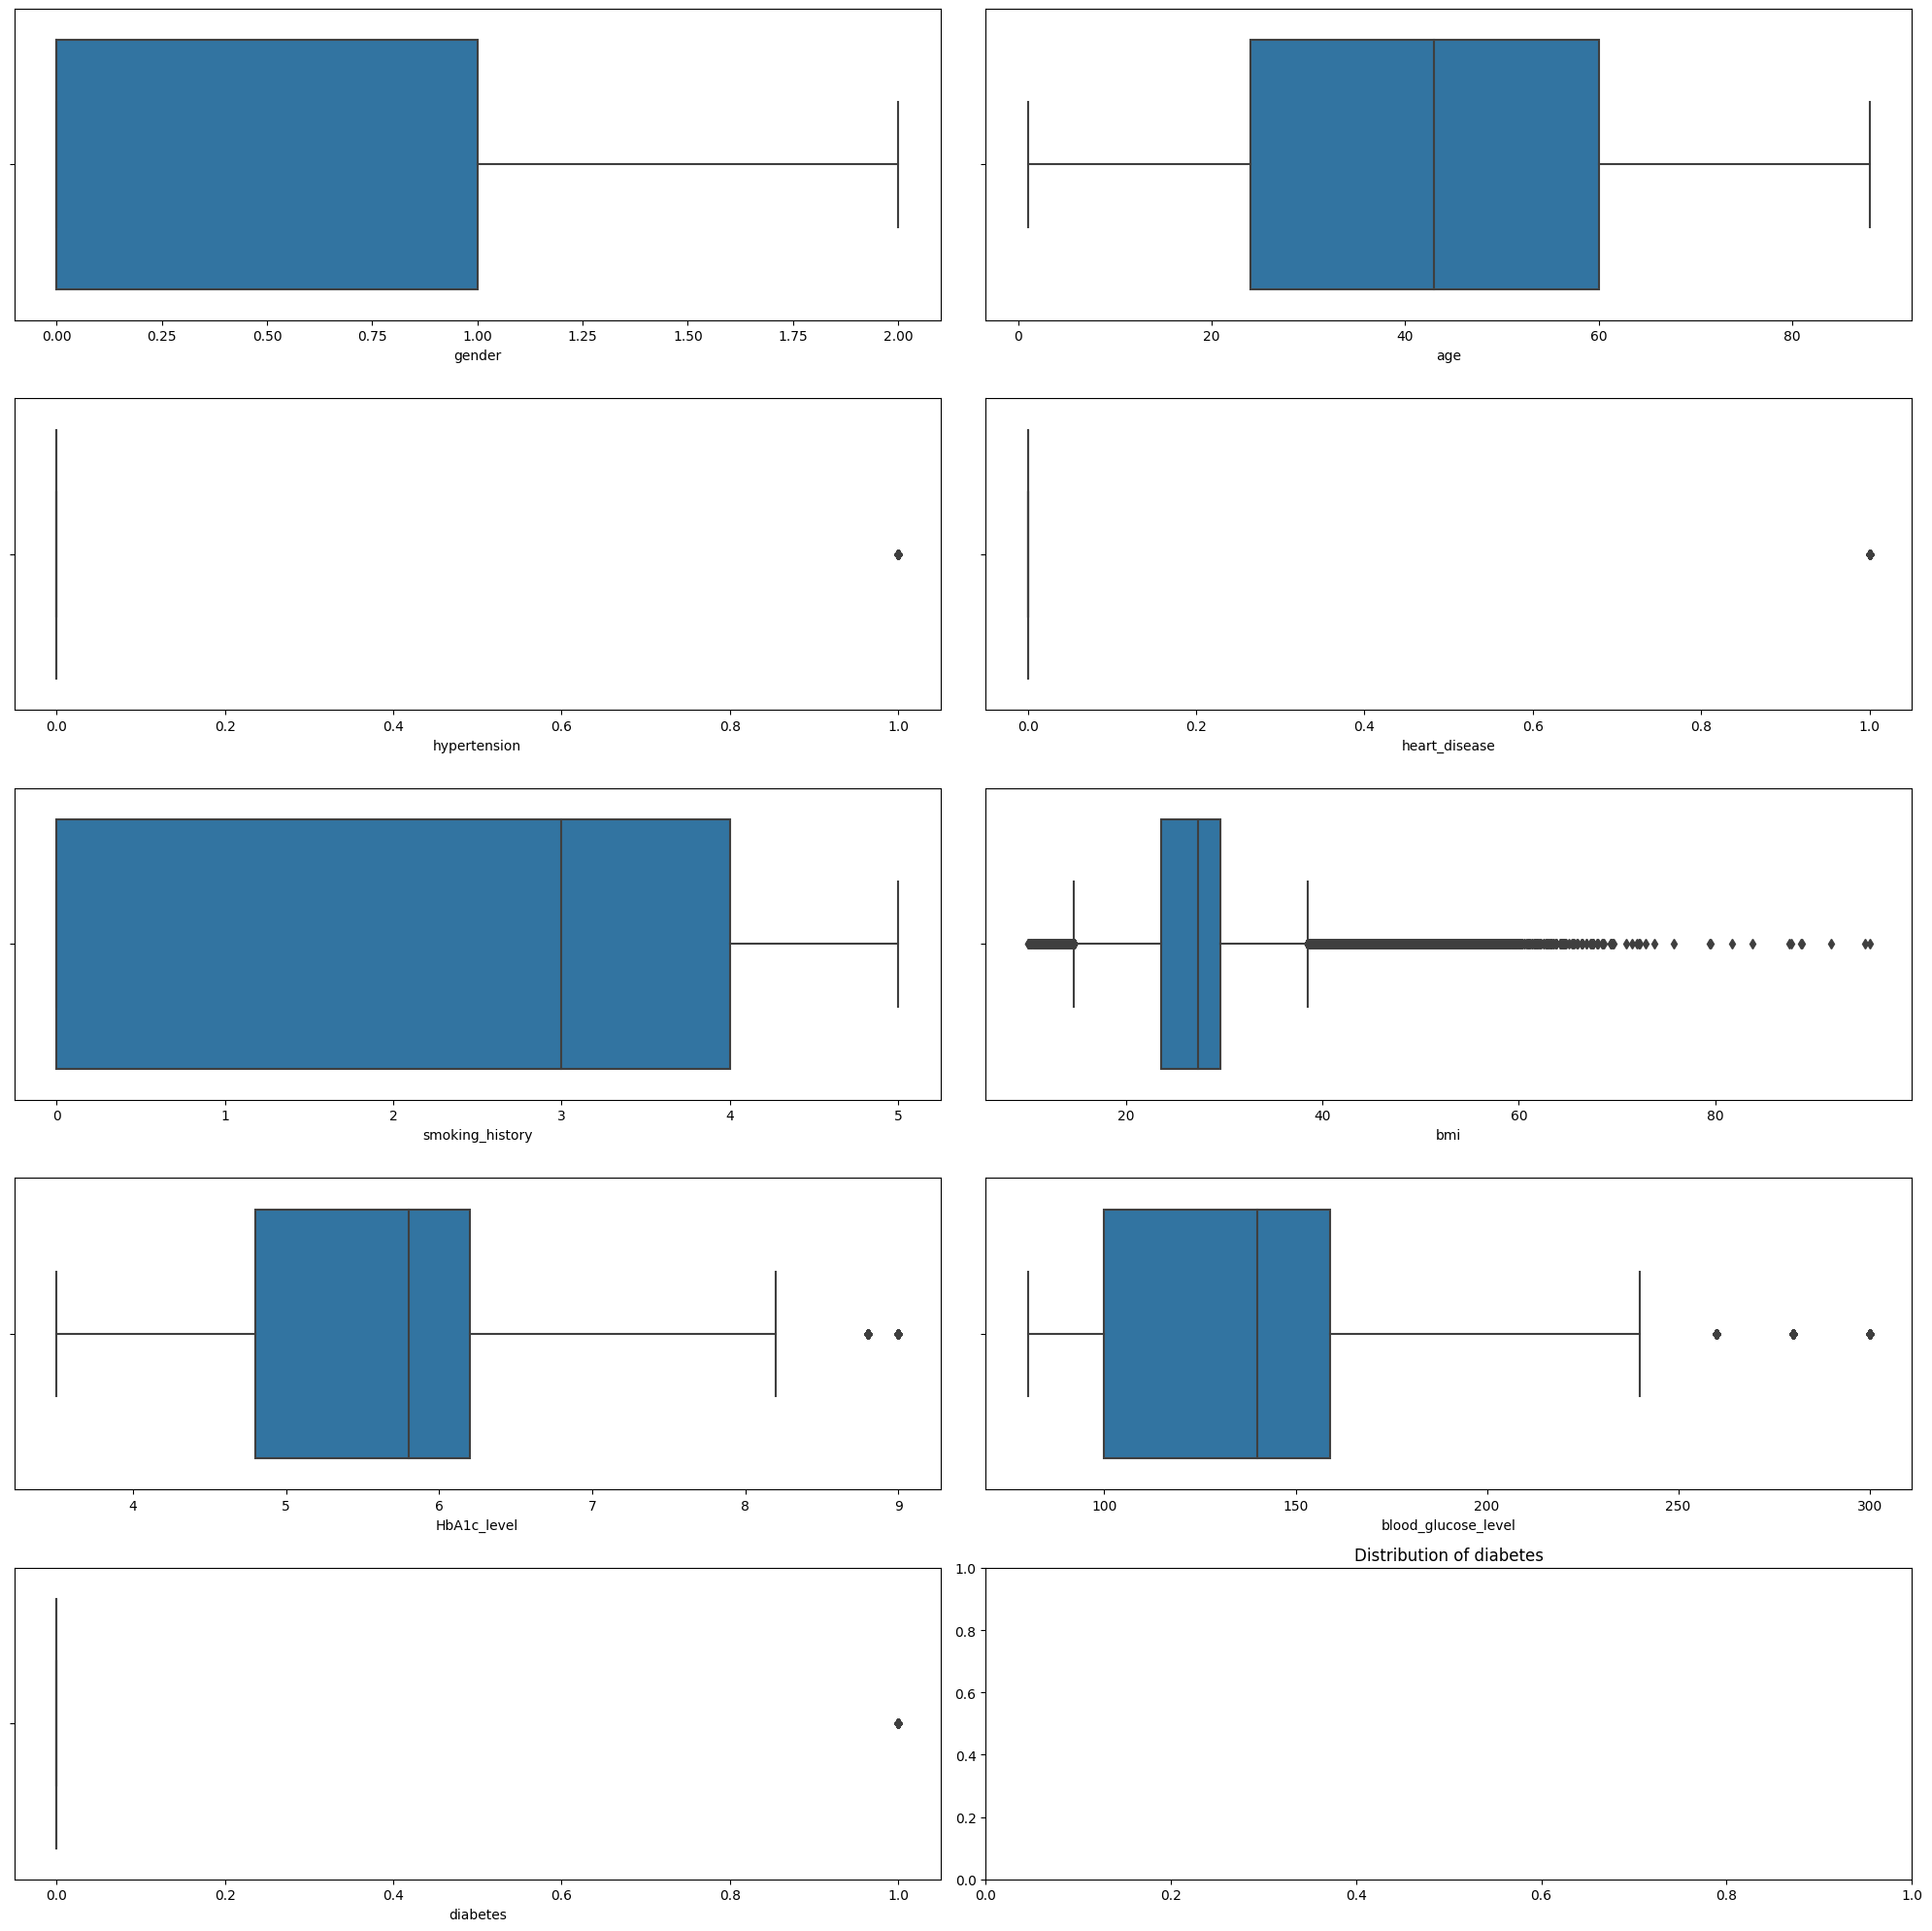

In [68]:
# Visualize each column /feature in a histogram using a for loop to understand the data better.
n_features  = len(data_df.columns.to_list())
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (20,20))

position  = axes.flatten()

for index, name_of_feature in enumerate(data_df):
    sns.boxplot(x = data_df[name_of_feature], ax = position[index])
    plt.title(f"Distribution of {name_of_feature}")
plt.tight_layout();
             


From the chart in the above cell, features : bmi, HbA1c_level and blood_glucose_level contain outliers . 

Visualize the distribution of the features with outliers to determine the data normalization /standardization technique to use.

<function matplotlib.pyplot.show(close=None, block=None)>

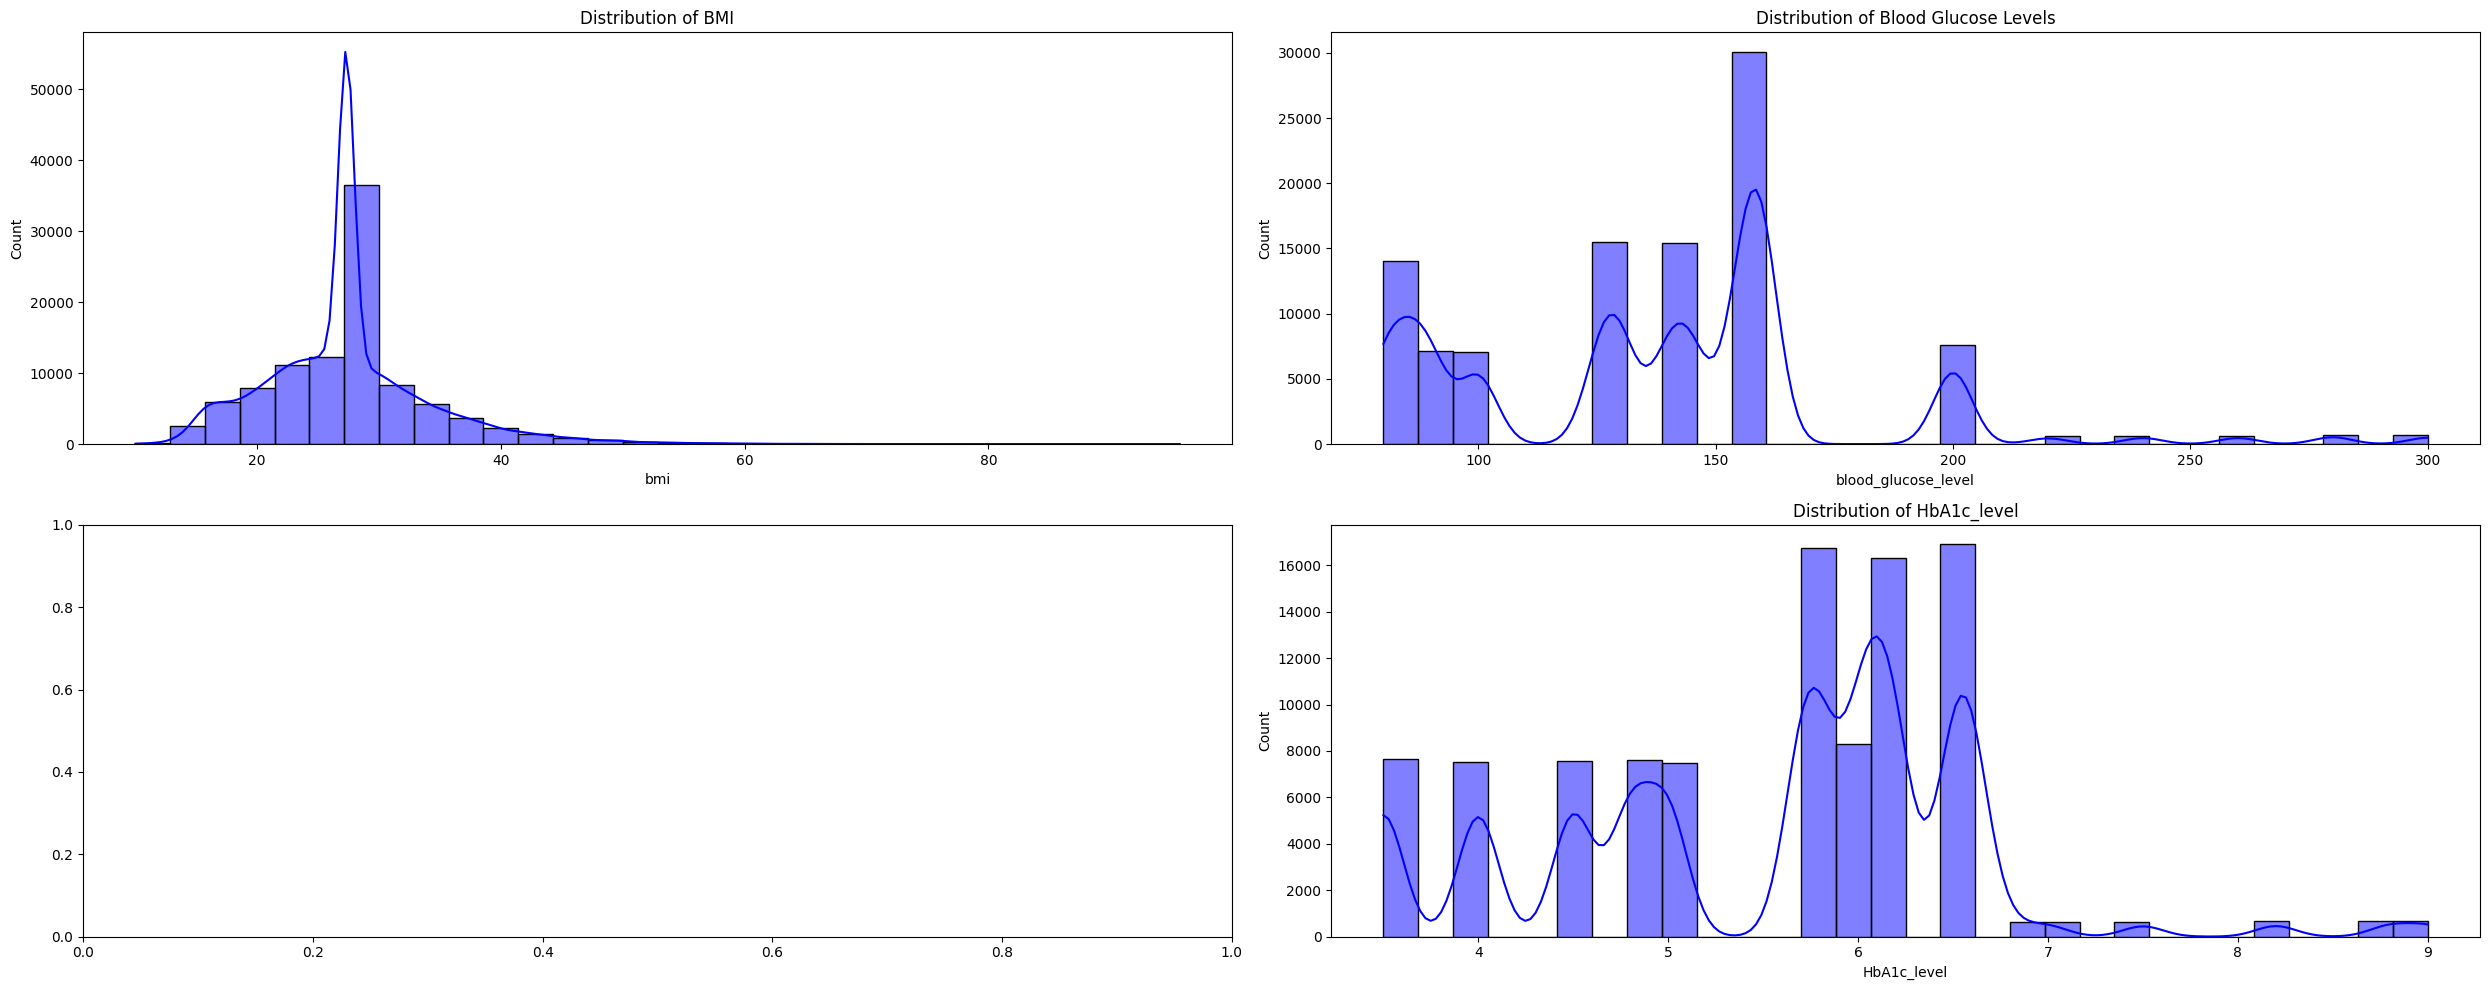

In [69]:
# Numerical Bivariate Analysis
# We create 3 visualizations for the features with outliers
# Namely: bmi,HbA1c_level and blood_glucose_level.
fig, axs = plt. subplots(nrows=2 ,ncols=2, figsize=(25,10))

sns.histplot(data_df["bmi"], kde=True, bins=30, color='blue', ax=axs[0,0])
axs[0,0].set_title("Distribution of BMI")

sns.histplot(data_df["HbA1c_level"], kde=True, bins=30, color='blue', ax=axs[1,1])
axs[1,1].set_title("Distribution of HbA1c_level")

# sns.scatterplot combines or compares two numeriacl columns against each other. 
sns.histplot(data_df["blood_glucose_level"], kde=True, bins=30, color='blue', ax=axs[0,1])
axs[0,1].set_title("Distribution of Blood Glucose Levels")

plt.tight_layout()
plt.show


Because the distribution is neither normal or uniform, we will use the RobustScaller during data scaling

In [31]:
# Collect numerical features together and categorical features seperately
numerical_df =data_df.select_dtypes(exclude="object")
categorical_df = data_df.select_dtypes(include="object")


In [33]:
numerical_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


In [32]:
categorical_df

,gender,smoking_history,age_group,bmi_group
0,Female,never,Senior,Overweight
1,Female,No Info,Adult,Overweight
2,Male,never,Adult,Overweight
3,Female,current,Adult,Normal
4,Male,current,Senior,Normal
...,...,...,...,...
99995,Female,No Info,Senior,Overweight
99996,Female,No Info,Child,Underweight
99997,Male,former,Senior,Overweight
99998,Female,never,Adult,Obese


### Bivariate Analysis.

<Axes: >

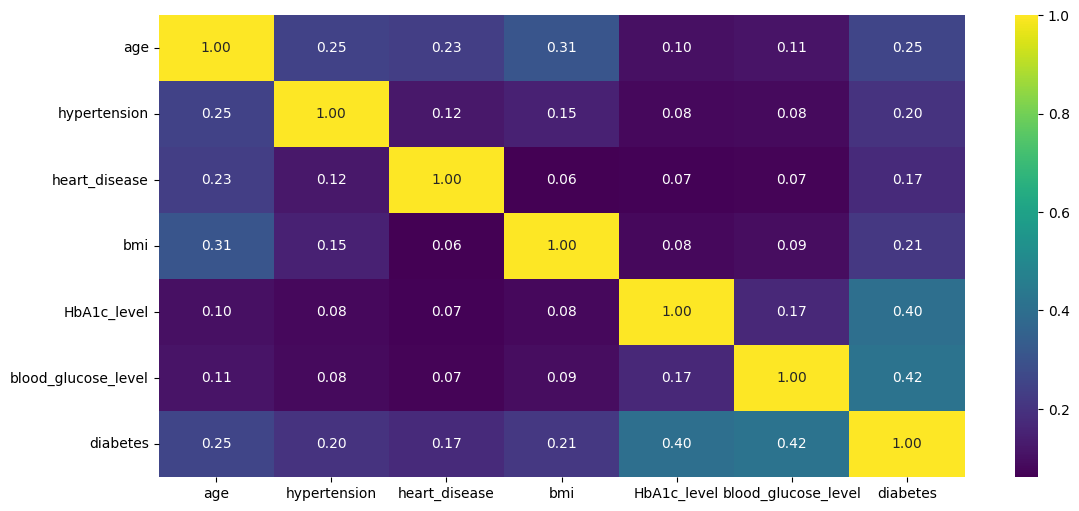

In [30]:
# use correlation to roughly visualize the relationships between numerical features
plt.figure(figsize = (13,6))
sns.heatmap(data=numerical_df.corr(), cmap = "viridis", annot=True, fmt=".2f")

Use countplot to visualize  the distribution of the categorical_df 

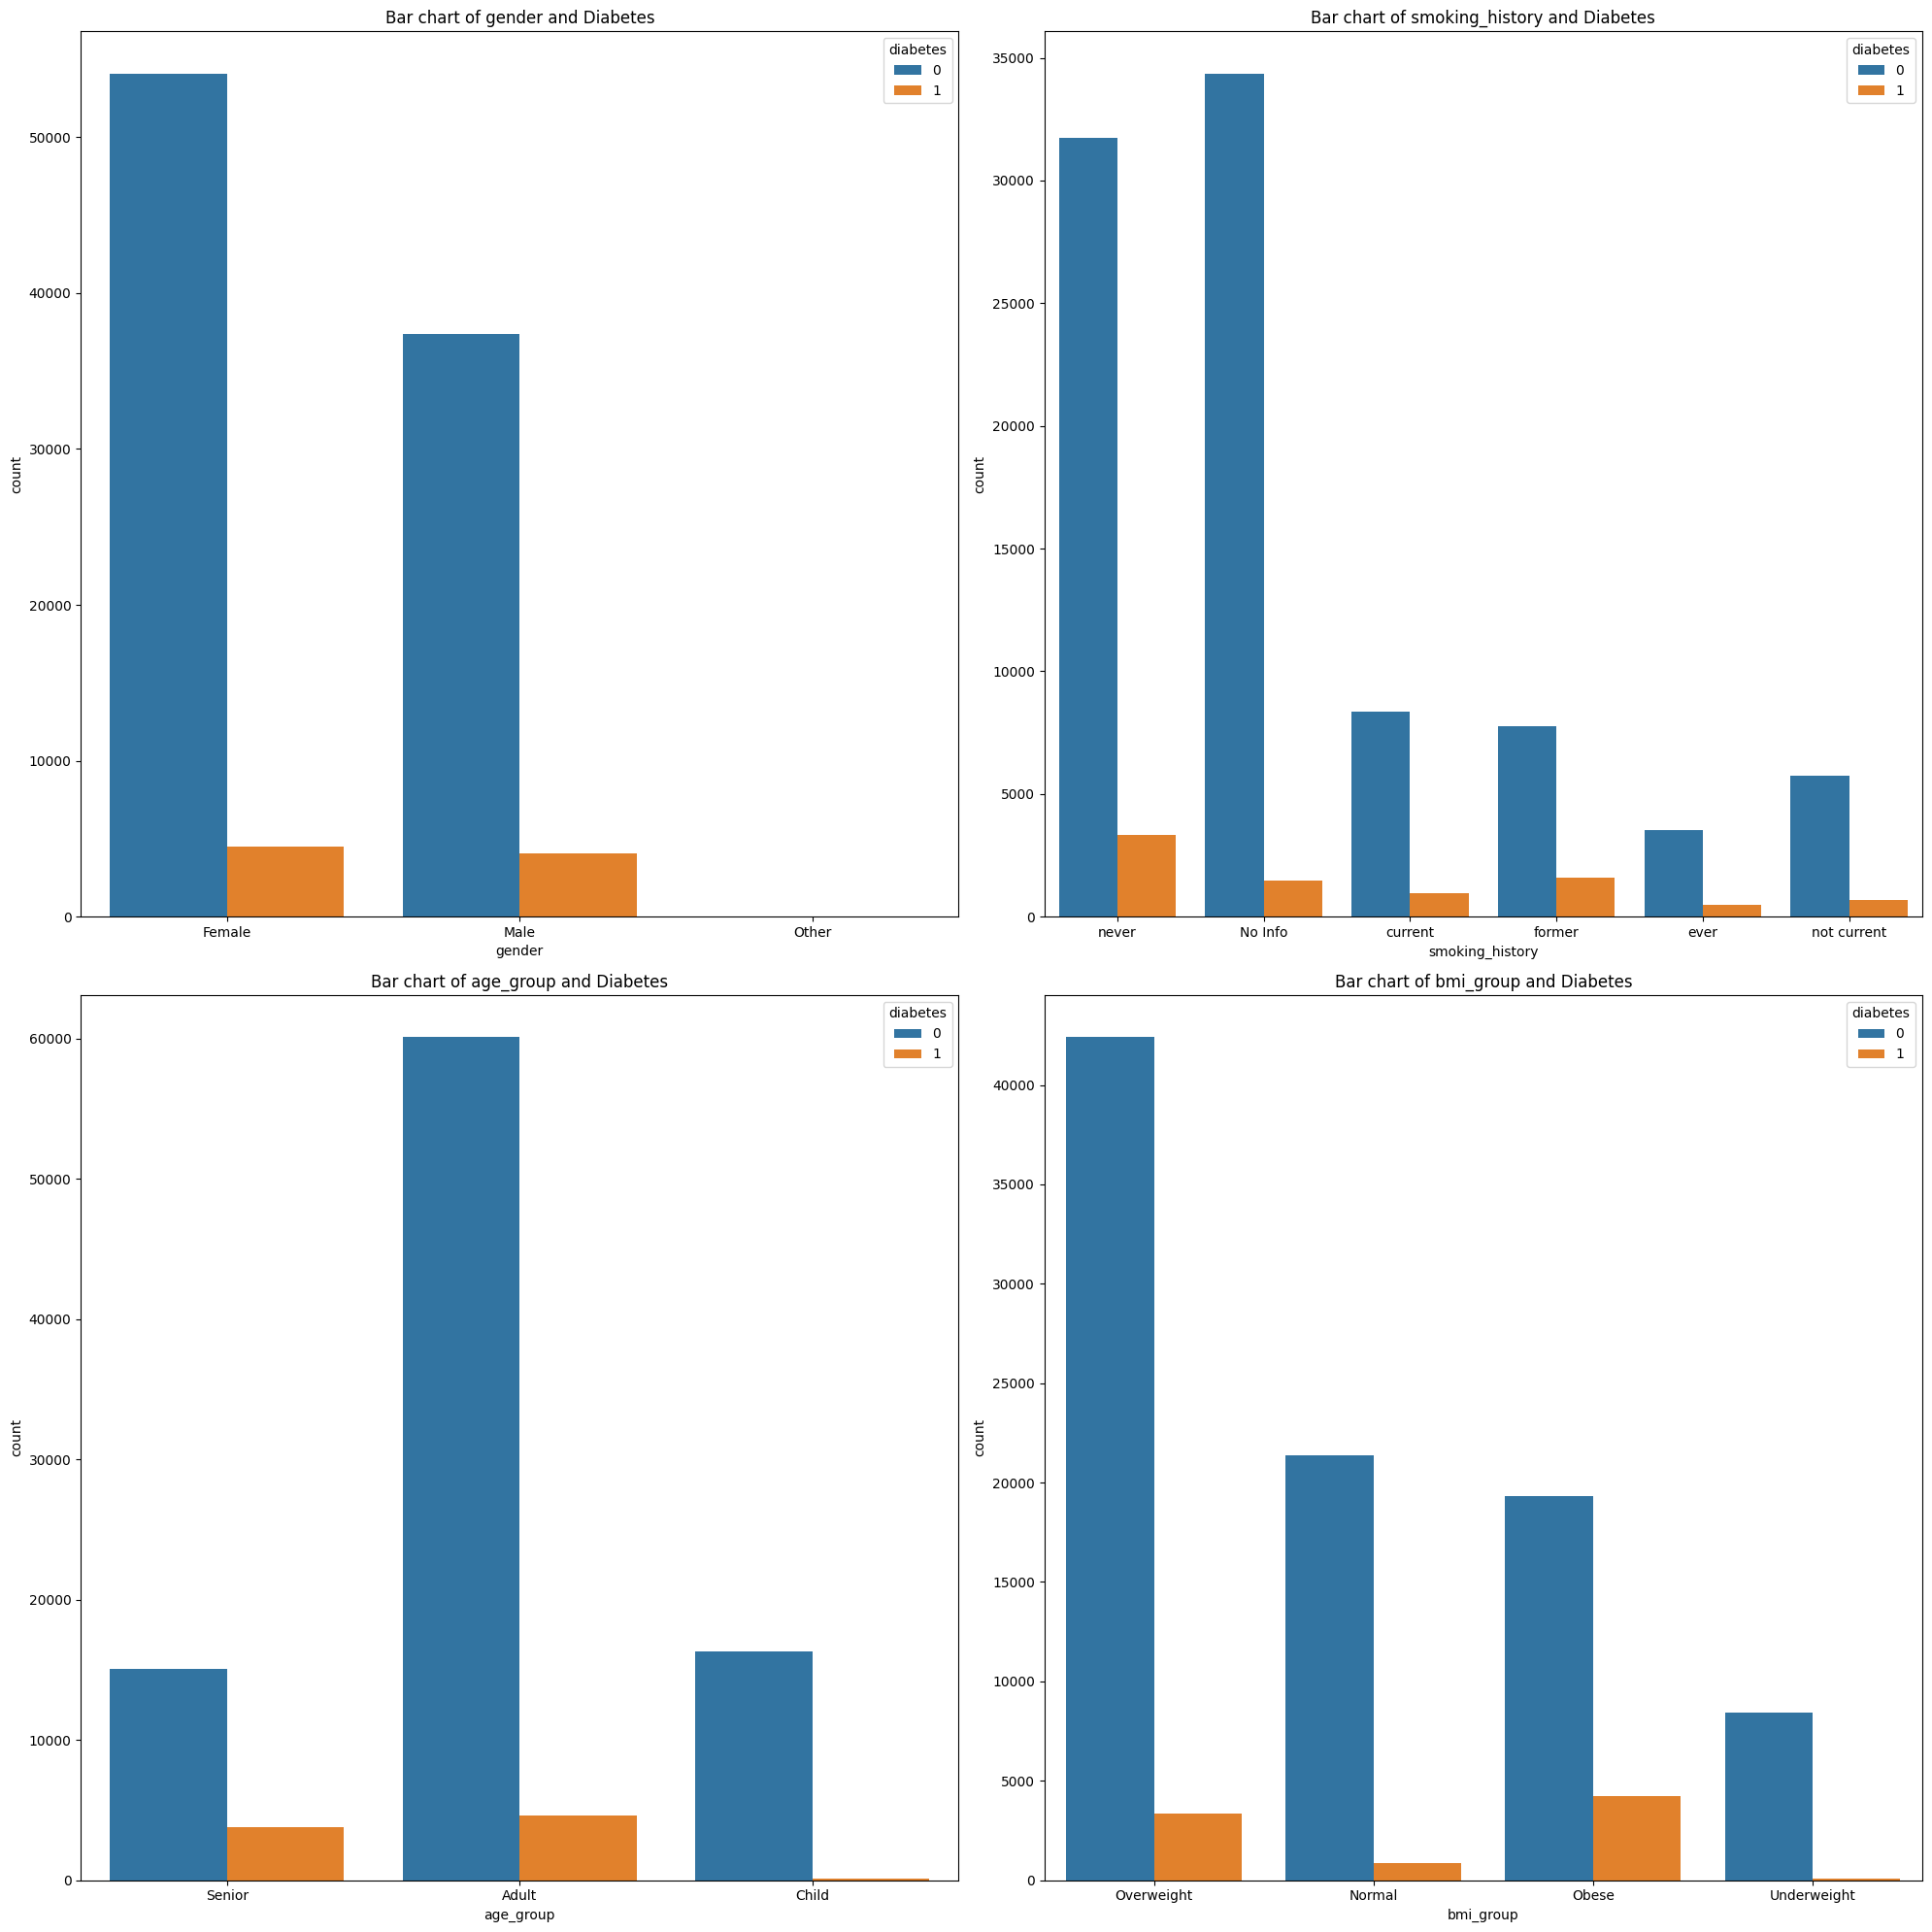

In [36]:
# use a countplot to visualize categorical_df
#cat_columns = categorical_df.columns.to_list
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(categorical_df):
    sns.countplot(data = categorical_df, x = feature, hue = data_df["diabetes"], ax = position[index])
    position[index].set_title(f"Bar chart of {feature} and Diabetes")

plt.tight_layout()

From the charts, Diabetes is present more in Females,Smoking History:never,Adults(Ages 18 to 65) and in most obesed patients .

#### Bivariate Analysis - Numerical_df 

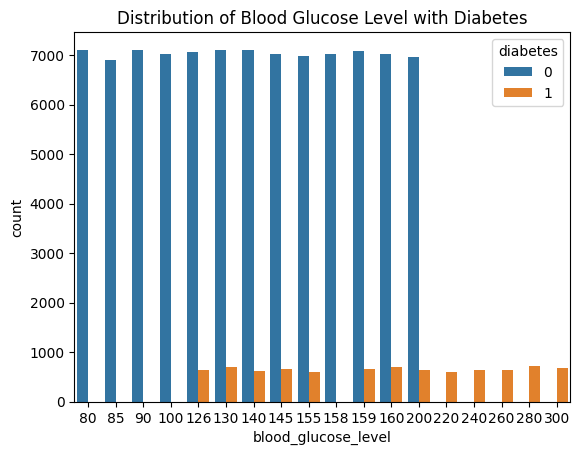

In [42]:
# vizualize the distribution between blood glucose level and diabetes
sns.countplot(data = numerical_df, x = "blood_glucose_level", hue = data_df["diabetes"]);
plt.title("Distribution of Blood Glucose Level with Diabetes");

From the chart above, this goes to show that patients withs blood glucose level 126 and above are likely liable to have diabetes. With patients having a blood glucose level of about 200 and above being strong positives for diabetes.

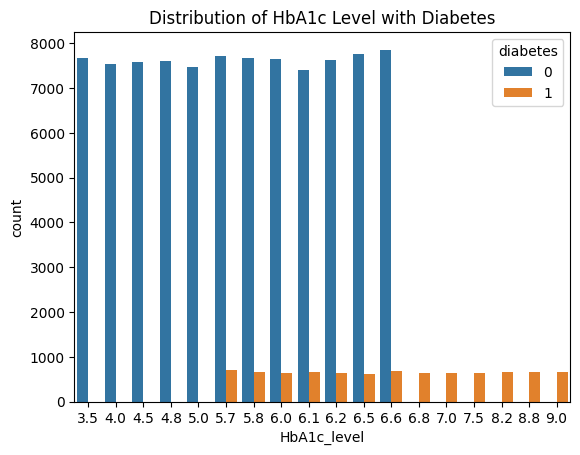

In [46]:
# vizualize the distribution between HbA1c level and diabetes
sns.countplot(data = numerical_df, x = "HbA1c_level", hue = data_df["diabetes"])
plt.title("Distribution of HbA1c Level with Diabetes");

From the charts , some patients withs a HbA1c level of 5.7 to 6.6 have diabetes while does above 6.6 are a strong positive for diabetes.

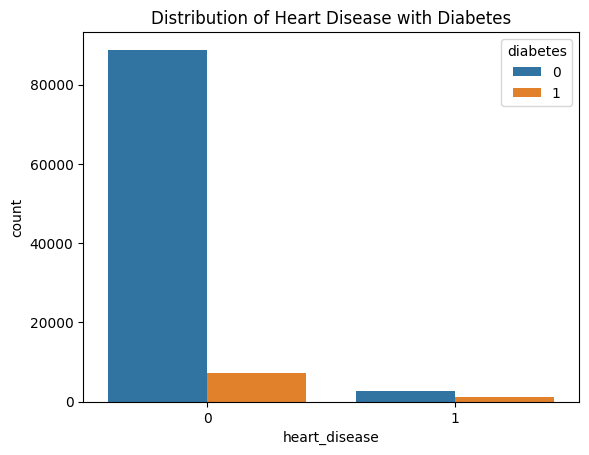

In [54]:
# visualizing bmi and diabetes
sns.countplot(data = numerical_df, x = "heart_disease", hue = data_df["diabetes"])
plt.title("Distribution of Heart Disease with Diabetes");

There are no clear corrolation between the heart disease and diabetes.

### Feature Engineering
This entails creating of relevant features or removal of irrelevant features to enable a smooth computer modelling/ training process.

In [59]:
# View the dataset
data_df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,bmi_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Senior,Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult,Overweight


##### Remove irrelevant features


In [61]:
# Remove Irrelevant features : age group and bmi group
data_df = data_df.drop(["age_group", "bmi_group"], axis= 1)
data_df.head(2)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


#### Convert categorical features to numerical

In [64]:
# Converting categorical features to numerical
# We use the Label Encoder

# Initialize the encoder
encoder = LabelEncoder()


In [ ]:
# use the encoder to fit and transform the categorical features to numerical ones
data_df["gender"] = encoder.fit_transform(data_df["gender"])


In [66]:
# use the encoder to fit and transform the categorical features to numerical ones
data_df["smoking_history"] = encoder.fit_transform(data_df["smoking_history"])
data_df["smoking_history"]


0        4
1        0
2        4
3        1
4        1
        ..
99995    0
99996    0
99997    3
99998    4
99999    1
Name: smoking_history, Length: 100000, dtype: int32

In [67]:
# view all together again
data_df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


### Data Pre-Processing

In [70]:
# Separate the target variable from the data set and prepare for training
# questions <==> features
# answers <==>labels/target

labels = data_df['diabetes']
features = data_df.drop(['diabetes'], axis=1)

In [75]:
labels.head(2)

0    0
1    0
Name: diabetes, dtype: int64

In [76]:
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80


### Spilting the data set into train set and test set

In [80]:
# features <==> X
# label <===> y
# X_train <==> train feature
# X_test<==> test feature 
# y_train <==> train labels
# y_test <==> test labels

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)
# Split the data into training and testing sets
# test_size=0.1 means 10% of the data will be used for testing
# random_state=42 ensures reproducibility of the results


Check the number of records for test and train sets

In [81]:
print(f"Our train feature set is :{len(X_train)}")
print(f"Our train target set is :{len(y_train)}")
print(f"Our test feature set is :{len(X_test)}")
print(f"Our test target set is :{len(y_test)}")

Our train feature set is :90000
Our train target set is :90000
Our test feature set is :10000
Our test target set is :10000


### Data Scaling

Use RobustScaler to scale the train and test features

In [83]:
# Scale our training data
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [84]:
# Initialize the model
model = LogisticRegression(random_state=42)

In [85]:
# Train the model using LogisticsRegression Classifier
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [86]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [87]:
# Evaluate the model
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

In [88]:
# Display results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print("\n")

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9137
           1       0.86      0.63      0.73       863

    accuracy                           0.96     10000
   macro avg       0.91      0.81      0.85     10000
weighted avg       0.96      0.96      0.96     10000

Confusion Matrix:
 [[9052   85]
 [ 323  540]]




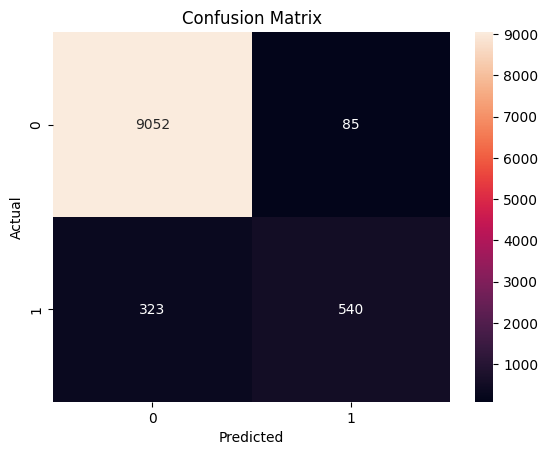

In [90]:
# Visualize the confusion matrix
sns.heatmap(data=matrix, annot=True, fmt=".6g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

At this state; </br>
True Positive TP : 540 </br>
True Negative TP : 9052 </br>
False Positive FP : 85 </BR>
False Negative FN : 323 </br>
The goal will be try and reduce FN AND increase TP as much as possible.


Clearly the class imbalance is affecting the model's performance

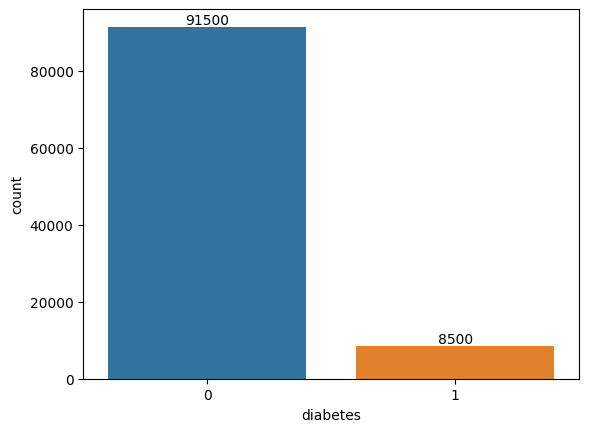

In [92]:
ax = sns.countplot(x="diabetes", data=data_df )
values = data_df["diabetes"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

We can do better by Fine tuning the model to perform better by specifying certian parameters during the class initialization.
We inform the model of our class imbalance and manually assign some class weight/importance to our weak class (class: `1`) 

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      9137
           1       0.48      0.87      0.62       863

    accuracy                           0.91     10000
   macro avg       0.73      0.89      0.78     10000
weighted avg       0.94      0.91      0.92     10000



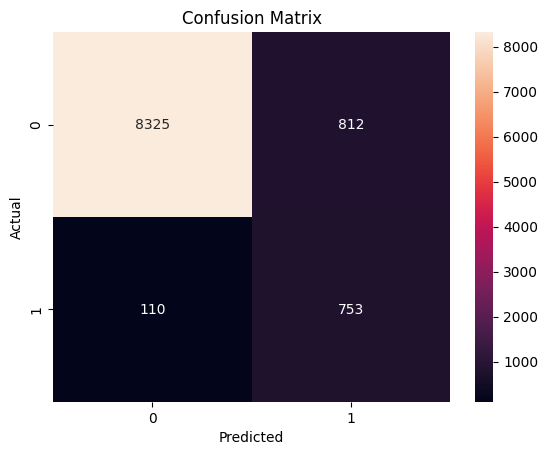

In [113]:
# Initialize the model
# Assuming misclassifying class 1 is 8 times more costly 
model = LogisticRegression(random_state=42, class_weight={0:1, 1:8}) 
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions on the test set
predictions = model.predict(X_test_scaled)
# Evaluate the model
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

# Display results
print("Classification Report:\n", report)
sns.heatmap(data=matrix, annot=True, fmt=".6g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

At this Stage : 
1. TP : 753
2. TN : 8325
3. FP : 812
4. FN : 110

The model is performing better with our FN reducing and TP increasing.

#### Trying other classification models.

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      9137
           1       0.48      0.87      0.62       863

    accuracy                           0.91     10000
   macro avg       0.73      0.89      0.78     10000
weighted avg       0.94      0.91      0.92     10000



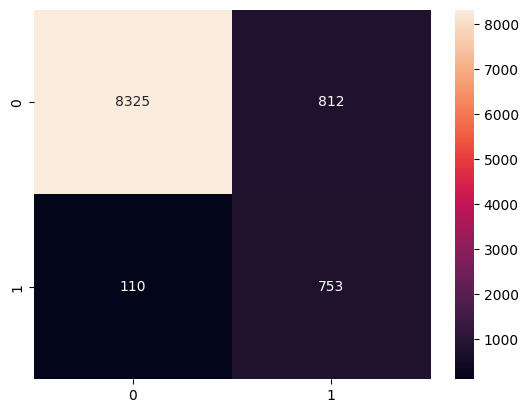

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      9137
           1       0.45      0.89      0.60       863

    accuracy                           0.90     10000
   macro avg       0.72      0.90      0.77     10000
weighted avg       0.94      0.90      0.91     10000



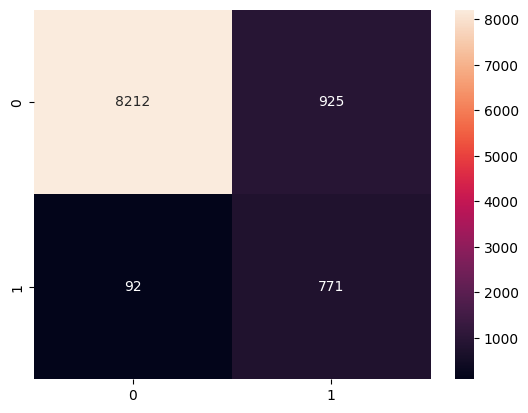

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      9137
           1       0.76      0.74      0.75       863

    accuracy                           0.96     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.96      0.96      0.96     10000



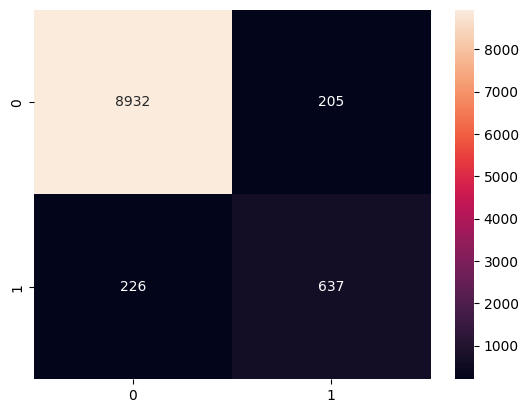

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      9137
           1       0.94      0.70      0.80       863

    accuracy                           0.97     10000
   macro avg       0.95      0.85      0.89     10000
weighted avg       0.97      0.97      0.97     10000



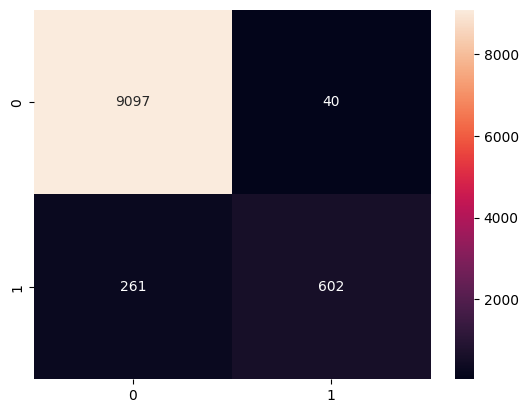

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


class_weights = {0: 1, 1: 8} 

# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='.6g')
    plt.show()

From the classifiers above, the best one seems to be :The Decision Tree Classifier

To automate this process of selecting the best parameters to train my model 

In [105]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [ 5, 7, 10],
    'class_weight': [{0:1, 1:6}, {0:1, 1:7}, {0:1, 1:8}]
}

grid_search = GridSearchCV(estimator=classifiers[2][0], param_grid=param_grid, cv=5, scoring="recall")
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'class_weight': {0: 1, 1: 8}, 'max_depth': 20, 'min_samples_split': 10}
Best Score: 0.80


In [106]:
# Select the best estimator classifier
grid_search.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 8}, max_depth=20,
                       min_samples_split=10, random_state=42)

### Best Decision Tree Model ###
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      9137
           1       0.55      0.83      0.66       863

    accuracy                           0.93     10000
   macro avg       0.77      0.88      0.81     10000
weighted avg       0.95      0.93      0.93     10000



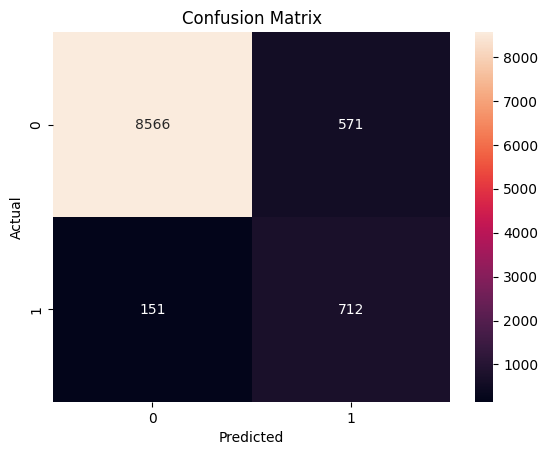

In [108]:
# Evaluate the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

# Display results
print("### Best Decision Tree Model ###")
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

From the best estimator , Decision Tree seems to be the best classifier to use, with a :
1. TP : 712
2. TN : 8566
3. FP : 571
4. FN : 151.</br>
</br>
</br>
With a precision of 55% and recall of 83% for class 1. And an accuracy of 93%.


#### Stark Health Clinic will be able to use this model to aid in the prediction process for diabetes and early treatment/ prevention.